# Alzheimer's Disease Prédictions

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,confusion_matrix
import xgboost as xgb
from xgboost import XGBClassifier


## Data

In [2]:
alzheimer = pd.read_csv('alzheimers_disease_data.csv')
alzheimer

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,6895,61,0,0,1,39.121757,0,1.561126,4.049964,6.555306,...,0,0,4.492838,1,0,0,0,0,1,XXXConfid
2145,6896,75,0,0,2,17.857903,0,18.767261,1.360667,2.904662,...,0,1,9.204952,0,0,0,0,0,1,XXXConfid
2146,6897,77,0,0,1,15.476479,0,4.594670,9.886002,8.120025,...,0,0,5.036334,0,0,0,0,0,1,XXXConfid
2147,6898,78,1,3,1,15.299911,0,8.674505,6.354282,1.263427,...,0,0,3.785399,0,0,0,0,1,1,XXXConfid


## Descriptive Analysis

In [3]:
# Chek dimension of the data
alzheimer.shape

(2149, 35)

In [4]:
# Check for missing values
alzheimer.isnull().sum()

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

In [5]:
# check for data types
alzheimer.dtypes

PatientID                      int64
Age                            int64
Gender                         int64
Ethnicity                      int64
EducationLevel                 int64
BMI                          float64
Smoking                        int64
AlcoholConsumption           float64
PhysicalActivity             float64
DietQuality                  float64
SleepQuality                 float64
FamilyHistoryAlzheimers        int64
CardiovascularDisease          int64
Diabetes                       int64
Depression                     int64
HeadInjury                     int64
Hypertension                   int64
SystolicBP                     int64
DiastolicBP                    int64
CholesterolTotal             float64
CholesterolLDL               float64
CholesterolHDL               float64
CholesterolTriglycerides     float64
MMSE                         float64
FunctionalAssessment         float64
MemoryComplaints               int64
BehavioralProblems             int64
A

In [6]:
# chef info
alzheimer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

In [7]:
# describe the data
alzheimer.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
count,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,...,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000,2149.000000
mean,5825.000000,74.908795,0.506282,0.697534,1.286645,27.655697,0.288506,10.039442,4.920202,4.993138,...,5.080055,0.208004,0.156817,4.982958,0.205212,0.158213,0.150768,0.158678,0.301536,0.353653
std,620.507185,8.990221,0.500077,0.996128,0.904527,7.217438,0.453173,5.757910,2.857191,2.909055,...,2.892743,0.405974,0.363713,2.949775,0.403950,0.365026,0.357906,0.365461,0.459032,0.478214
min,4751.000000,60.000000,0.000000,0.000000,0.000000,15.008851,0.000000,0.002003,0.003616,0.009385,...,0.000460,0.000000,0.000000,0.001288,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5288.000000,67.000000,0.000000,0.000000,1.000000,21.611408,0.000000,5.139810,2.570626,2.458455,...,2.566281,0.000000,0.000000,2.342836,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5825.000000,75.000000,1.000000,0.000000,1.000000,27.823924,0.000000,9.934412,4.766424,5.076087,...,5.094439,0.000000,0.000000,5.038973,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6362.000000,83.000000,1.000000,1.000000,2.000000,33.869778,1.000000,15.157931,7.427899,7.558625,...,7.546981,0.000000,0.000000,7.581490,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,6899.000000,90.000000,1.000000,3.000000,3.000000,39.992767,1.000000,19.989293,9.987429,9.998346,...,9.996467,1.000000,1.000000,9.999747,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
# drop 'DoctorInCharge', not useful for the analysis
alzheimer = alzheimer.drop(columns=['DoctorInCharge'])

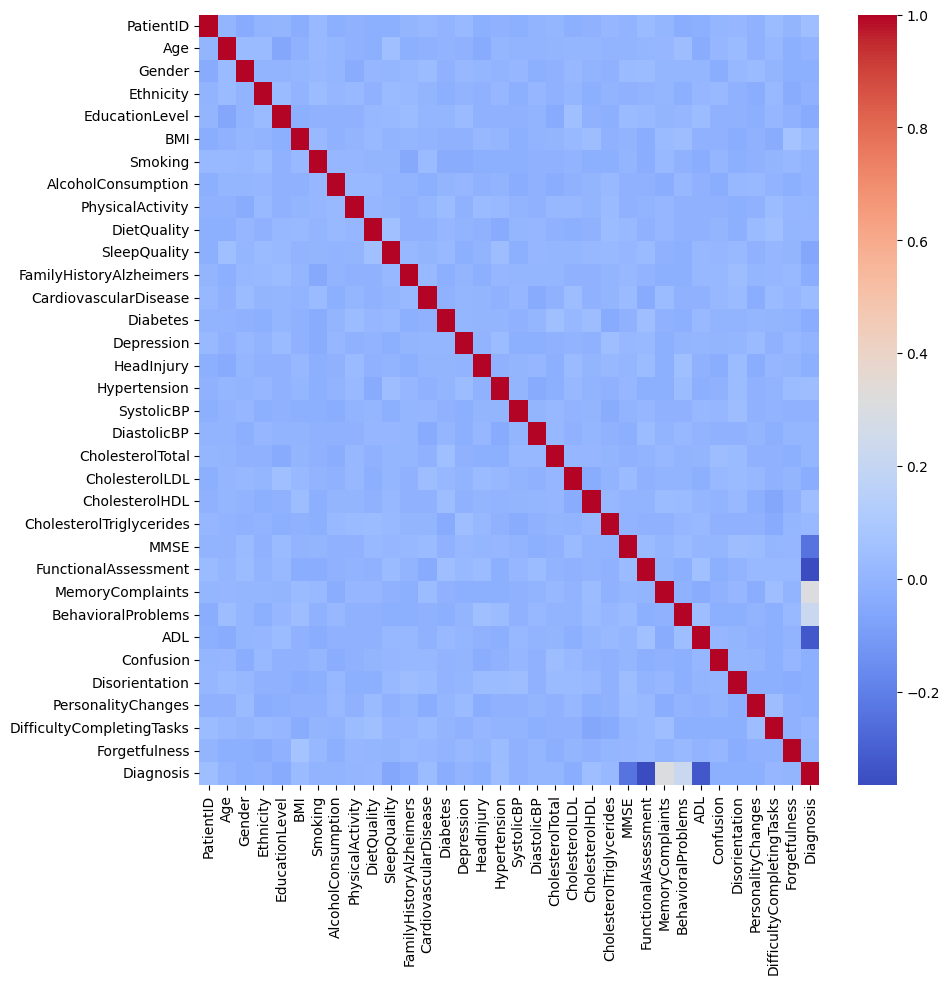

In [9]:
# see the correlation between the variables
plt.figure(figsize=(10,10))
sns.heatmap(alzheimer.corr(), cbar=True, cmap='coolwarm')
plt.savefig('correlation.png')

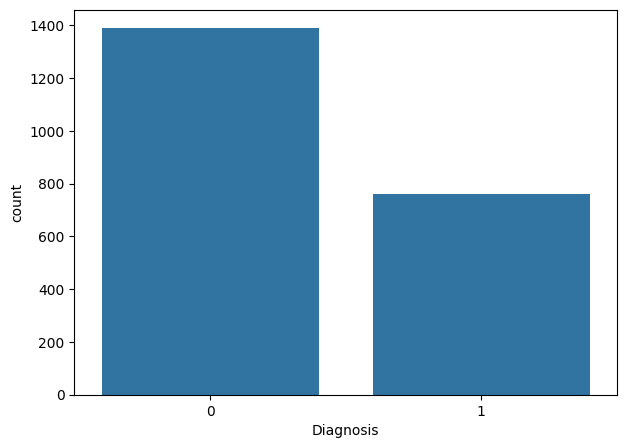

In [42]:
# Chek the distribution of diagnosis, 1 = Alzheimer, 0 = Pas Alzheimer
plt.figure(figsize=(7, 5))
sns.countplot(x='Diagnosis', data=alzheimer)
plt.savefig('countplot.png')

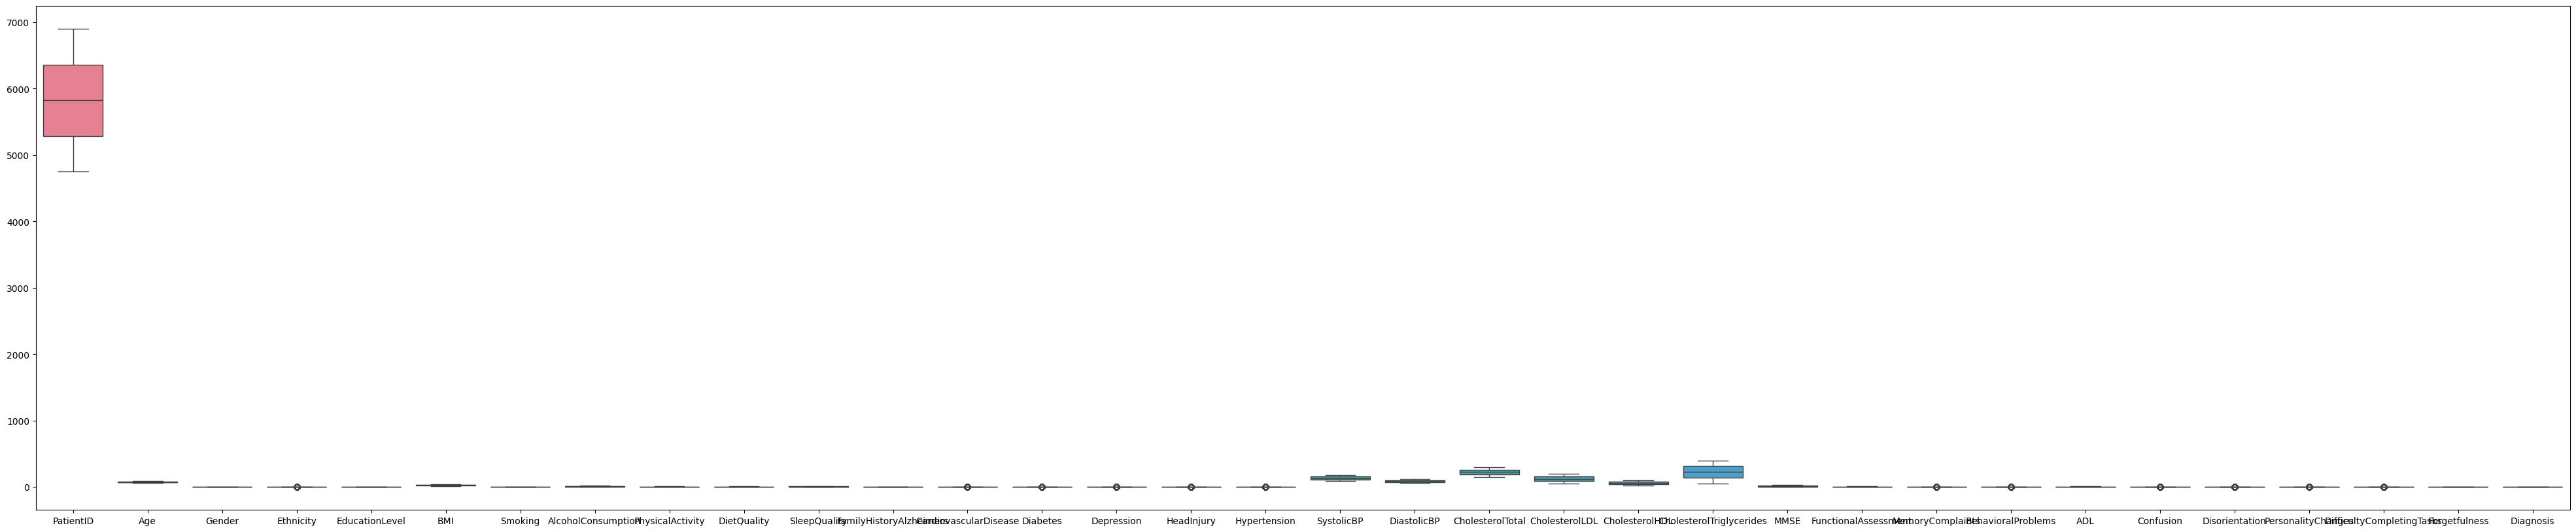

In [11]:
plt.figure(figsize=(50,10))
sns.boxplot(alzheimer)
plt.savefig('boxplot.png')

## Preprocessing Data

In [12]:
# Split the data into features and target
X = alzheimer.drop(columns=['Diagnosis'])
y = alzheimer['Diagnosis']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## ML's model for binary classification

### Logistic Regression

In [13]:
# use logistic regression model to predict the diagnosis of Alzheimer disease with cross validation
model_lr = LogisticRegression()
cv_scores_lr = cross_val_score(model_lr, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validated accuracy scores (Logistic Regression): {cv_scores_lr}")
print(f"Mean cross-validated accuracy (Logistic Regression): {cv_scores_lr.mean()}")

Cross-validated accuracy scores (Logistic Regression): [0.81976744 0.83430233 0.86337209 0.85755814 0.80466472]
Mean cross-validated accuracy (Logistic Regression): 0.8359329446064139


In [14]:
model_lr.fit(X_train, y_train)
predictions_lr = model_lr.predict(X_test)

accuracy_lr = accuracy_score(y_test, predictions_lr)
precision_lr = precision_score(y_test, predictions_lr)
recall_lr = recall_score(y_test, predictions_lr)
f1_lr = f1_score(y_test, predictions_lr)
roc_auc_lr = roc_auc_score(y_test, predictions_lr)

print(f"Test accuracy (Logistic Regression): {accuracy_lr}")
print(f"Test precision (Logistic Regression): {precision_lr}")
print(f"Test recall (Logistic Regression): {recall_lr}")
print(f"Test F1 score (Logistic Regression): {f1_lr}")
print(f"Test ROC AUC (Logistic Regression): {roc_auc_lr}")


Test accuracy (Logistic Regression): 0.8255813953488372
Test precision (Logistic Regression): 0.7785714285714286
Test recall (Logistic Regression): 0.7124183006535948
Test F1 score (Logistic Regression): 0.7440273037542662
Test ROC AUC (Logistic Regression): 0.8002524716264364


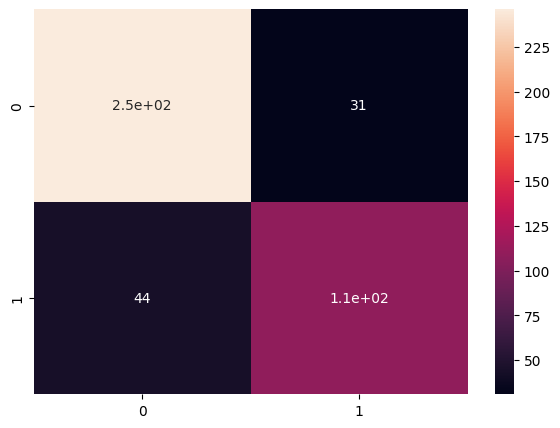

In [41]:
plt.figure(figsize=(7, 5))
cm_lr = confusion_matrix(y_test, predictions_lr)
sns.heatmap(cm_lr, annot=True)
plt.savefig('Reg Log/confusion_matrix.png')

### Random Forest

In [16]:
# use Random Forest Classifier to predict the diagnosis of Alzheimer disease with cross-validation
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)
cv_scores_rf = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validated accuracy scores (Random Forest): {cv_scores_rf}")
print(f"Mean cross-validated accuracy (Random Forest): {cv_scores_rf.mean()}")

Cross-validated accuracy scores (Random Forest): [0.90116279 0.94476744 0.95639535 0.9244186  0.90379009]
Mean cross-validated accuracy (Random Forest): 0.9261068547020137


In [17]:
model_rf.fit(X_train, y_train)
predictions_rf = model_rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, predictions_rf)
precision_rf = precision_score(y_test, predictions_rf)
recall_rf = recall_score(y_test, predictions_rf)
f1_rf = f1_score(y_test, predictions_rf)
roc_auc_rf = roc_auc_score(y_test, predictions_rf)

print(f"Test accuracy (Random Forest): {accuracy_rf}")
print(f"Test precision (Random Forest): {precision_rf}")
print(f"Test recall (Random Forest): {recall_rf}")
print(f"Test F1 score (Random Forest): {f1_rf}")
print(f"Test ROC AUC (Random Forest): {roc_auc_rf}")

Test accuracy (Random Forest): 0.9279069767441861
Test precision (Random Forest): 0.9621212121212122
Test recall (Random Forest): 0.8300653594771242
Test F1 score (Random Forest): 0.8912280701754386
Test ROC AUC (Random Forest): 0.9060074089804394


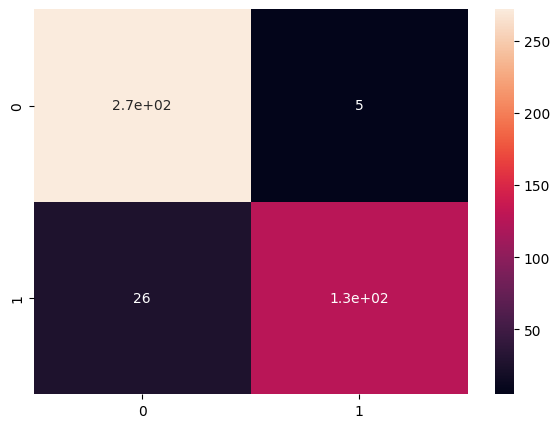

In [43]:
plt.figure(figsize=(7, 5))
cm_rf = confusion_matrix(y_test, predictions_rf)
sns.heatmap(cm_rf, annot=True)
plt.savefig('Random Forest/confusion_matrix.png')

### XGBoost

In [19]:
# Use Xgboost model to predict with cross validation
model_xgb = xgb.XGBClassifier(random_state=42)
cv_scores_xgb = cross_val_score(model_xgb, X_train, y_train, cv=5, scoring='accuracy')

print(f"Cross-validated accuracy scores (XGBoost): {cv_scores_xgb}")
print(f"Mean cross-validated accuracy (XGBoost): {cv_scores_xgb.mean()}")

Cross-validated accuracy scores (XGBoost): [0.9505814  0.95930233 0.95639535 0.94186047 0.93294461]
Mean cross-validated accuracy (XGBoost): 0.9482168282595431


In [20]:
model_xgb.fit(X_train, y_train)
predictions_xgb = model_xgb.predict(X_test)

accuracy_xgb = accuracy_score(y_test, predictions_xgb)
precision_xgb = precision_score(y_test, predictions_xgb)
recall_xgb = recall_score(y_test, predictions_xgb)
f1_xgb = f1_score(y_test, predictions_xgb)
roc_auc_xgb = roc_auc_score(y_test, predictions_xgb)

print(f"Test accuracy (XGBoost): {accuracy_xgb}")
print(f"Test precision (XGBoost): {precision_xgb}")
print(f"Test recall (XGBoost): {recall_xgb}")
print(f"Test F1 score (XGBoost): {f1_xgb}")
print(f"Test ROC AUC (XGBoost): {roc_auc_xgb}")


Test accuracy (XGBoost): 0.9534883720930233
Test precision (XGBoost): 0.9235668789808917
Test recall (XGBoost): 0.9477124183006536
Test F1 score (XGBoost): 0.9354838709677419
Test ROC AUC (XGBoost): 0.9521955593308322


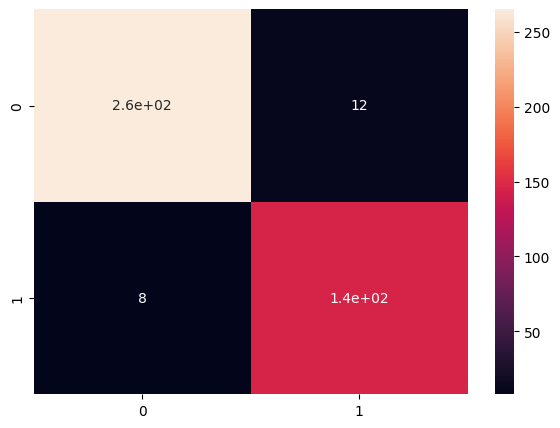

In [44]:
plt.figure(figsize=(7, 5))
cm_xgb = confusion_matrix(y_test, predictions_xgb)
sns.heatmap(cm_xgb, annot=True)
plt.savefig('XGBoost/confusion_matrix.png')

## Deep Learning

### Artificial Neural Network (ANN)

In [22]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

/Users/aaudric/miniconda3/envs/tf-metal/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-06-28 22:50:21.054804: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-06-28 22:50:21.054830: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-06-28 22:50:21.054838: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-06-28 22:50:21.055059: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-28 22:50:21.055075: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory

Epoch 1/50


2024-06-28 22:50:21.843066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6769 - loss: 0.6417 - val_accuracy: 0.6948 - val_loss: 0.5758
Epoch 2/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7294 - loss: 0.5497 - val_accuracy: 0.7384 - val_loss: 0.5122
Epoch 3/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8061 - loss: 0.4587 - val_accuracy: 0.7849 - val_loss: 0.4732
Epoch 4/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8149 - loss: 0.4269 - val_accuracy: 0.7965 - val_loss: 0.4516
Epoch 5/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8441 - loss: 0.3816 - val_accuracy: 0.7907 - val_loss: 0.4393
Epoch 6/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8664 - loss: 0.3525 - val_accuracy: 0.8023 - val_loss: 0.4314
Epoch 7/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8661 - loss: 0.3433 - val_accuracy: 0.7936 - val_loss: 0.4263
Epoch 8/50
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8718 - loss: 0.3185 - val_accuracy: 0.7878 - val_loss: 0.4275
E

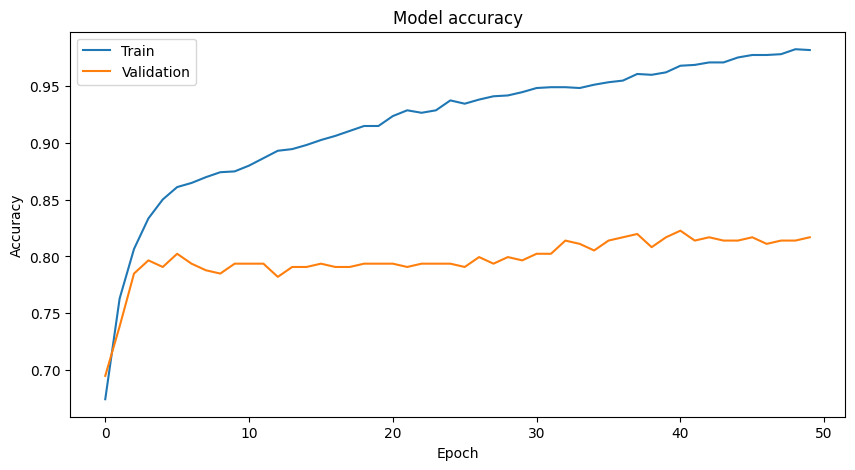

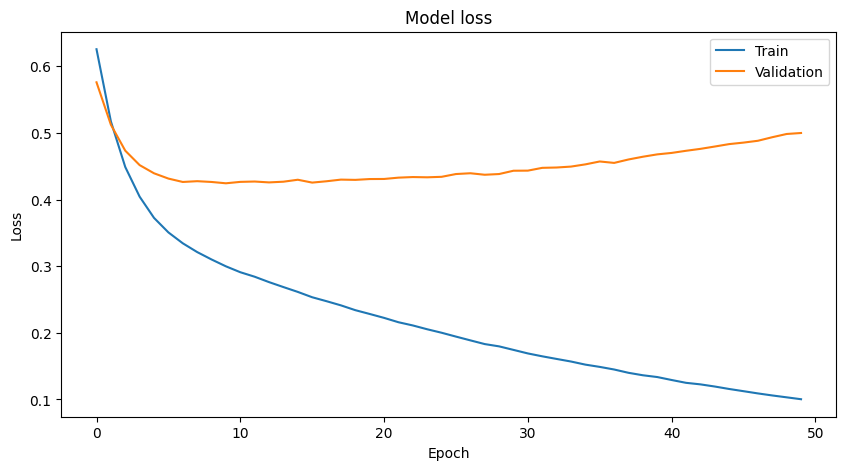

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.legend(['Train', 'Validation'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.savefig('ANN/accuracy.png')
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.legend(['Train', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.savefig('ANN/loss.png')
plt.show()

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Test accuracy (ANN): 0.8302325581395349
Test precision (ANN): 0.773972602739726
Test recall (ANN): 0.738562091503268
Test F1 score (ANN): 0.7558528428093646
Test ROC AUC (ANN): 0.8097142587480238


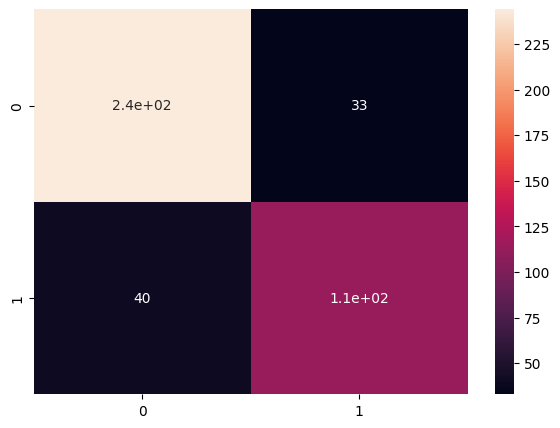

In [47]:
predictions_rn = model.predict(X_test)
predictions_rn = (predictions_rn > 0.5).astype(int)
accuracy_rn = accuracy_score(y_test, predictions_rn)
precision_rn = precision_score(y_test, predictions_rn)
recall_rn = recall_score(y_test, predictions_rn)
f1_rn = f1_score(y_test, predictions_rn)
roc_auc_rn = roc_auc_score(y_test, predictions_rn)

print(f"Test accuracy (ANN): {accuracy_rn}")
print(f"Test precision (ANN): {precision_rn}")
print(f"Test recall (ANN): {recall_rn}")
print(f"Test F1 score (ANN): {f1_rn}")
print(f"Test ROC AUC (ANN): {roc_auc_rn}")

plt.figure(figsize=(7, 5))
cm_rn = confusion_matrix(y_test, predictions_rn)
sns.heatmap(cm_rn, annot=True)
plt.savefig('ANN/confusion_matrix.png')




In [25]:
# Save the model
model.save('ANN/model.keras')

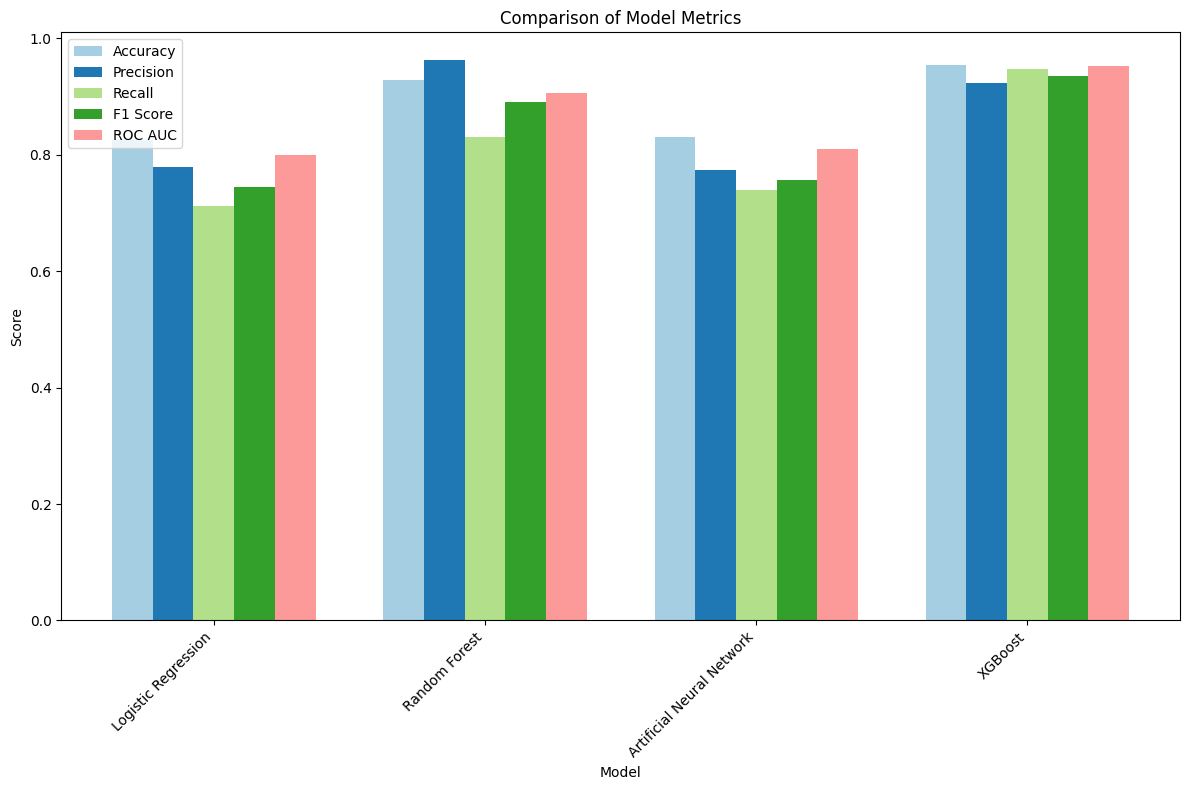

In [37]:
model_metrics = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Artificial Neural Network', 'XGBoost'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_rn, accuracy_xgb],
    'Precision': [precision_lr, precision_rf, precision_rn, precision_xgb],
    'Recall': [recall_lr, recall_rf, recall_rn, recall_xgb],
    'F1 Score': [f1_lr, f1_rf, f1_rn, f1_xgb],
    'ROC AUC': [roc_auc_lr, roc_auc_rf, roc_auc_rn, roc_auc_xgb]
})

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']
bar_width = 0.15  

bar_positions = range(len(model_metrics))

palette = sns.color_palette("Paired", len(metrics))


fig, ax = plt.subplots(figsize=(12, 8))

for i, metric in enumerate(metrics):
    ax.bar([pos + i * bar_width for pos in bar_positions], 
           model_metrics[metric], 
           width=bar_width, 
           label=metric,
           color=palette[i])

ax.set_xticks([pos + 2 * bar_width for pos in bar_positions])
ax.set_xticklabels(model_metrics['Model'], rotation=45, ha='right')

ax.set_xlabel('Model')
ax.set_ylabel('Score')
ax.set_title('Comparison of Model Metrics')

ax.legend()

plt.tight_layout()
plt.savefig('model_metrics.png')
plt.show()
